<a href="https://colab.research.google.com/github/ayoolafelix/Expresso-Churn/blob/master/Expresso_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret
from pycaret.classification import *
import numpy as np
import pandas as pd
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


import warnings
warnings.filterwarnings("ignore")

# Set all options
%matplotlib inline
plt.style.use('seaborn-notebook')
plt.rcParams["figure.figsize"] = (20, 3)
pd.options.display.float_format = '{:20,.4f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(context="paper", font="monospace")

     |████████████████████████████████| 256kB 3.5MB/s 
     |████████████████████████████████| 1.6MB 10.6MB/s 
     |████████████████████████████████| 61kB 6.4MB/s 
     |████████████████████████████████| 102kB 9.4MB/s 
     |████████████████████████████████| 65.9MB 57kB/s 
     |████████████████████████████████| 6.8MB 44.6MB/s 
     |████████████████████████████████| 266kB 44.3MB/s 
     |████████████████████████████████| 12.4MB 37.7MB/s 
     |████████████████████████████████| 1.2MB 41.2MB/s 
     |████████████████████████████████| 266kB 40.9MB/s 
     |████████████████████████████████| 552kB 46.6MB/s 
     |████████████████████████████████| 235kB 41.5MB/s 
     |████████████████████████████████| 2.1MB 37.5MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 604kB 41.3MB/s 
     |████████████████████████████████| 71kB 8.3MB/s 
     |████████████████████████████████| 3.1MB 38.1MB/s 
     |████████████████████████████████| 71kB 8.5MB/s 
  

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [55]:
test = pd.read_csv('/content/gdrive/My Drive/DSN Pre-Bootcamp Hackathon Expresso Churn Prediction Challenge by Data Science Nigeria/Test.csv')
train = pd.read_csv('/content/gdrive/My Drive/DSN Pre-Bootcamp Hackathon Expresso Churn Prediction Challenge by Data Science Nigeria/Train.csv')
sample = pd.read_csv('/content/gdrive/My Drive/DSN Pre-Bootcamp Hackathon Expresso Churn Prediction Challenge by Data Science Nigeria/sample_submission.csv')

In [56]:
train.shape

(400000, 19)

In [57]:
test.shape

(100000, 18)

In [58]:
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,"17,000.0000",32.0000,"18,000.0000","6,000.0000",34.0000,nan,97.0000,355.0000,6.0000,nan,nan,NO,62,All-net 500F=2000F;5d,35.0000,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,"4,300.0000",29.0000,"4,427.0000","1,476.0000",37.0000,"1,764.0000",8.0000,3.0000,0.0000,nan,2.0000,NO,40,"Data: 100 F=40MB,24H",22.0000,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,"1,500.0000",3.0000,"1,500.0000",500.0000,3.0000,nan,30.0000,30.0000,nan,nan,nan,NO,32,All-net 500F=2000F;5d,3.0000,0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,"1,500.0000",3.0000,"2,497.0000",832.0000,4.0000,0.0000,159.0000,45.0000,19.0000,nan,nan,NO,18,On net 200F=Unlimited _call24H,3.0000,0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,nan,nan,498.0000,166.0000,3.0000,1.0000,1.0000,3.0000,nan,nan,nan,NO,50,NaN,nan,0


In [59]:
test['CHURN'] = 5

In [60]:
df = pd.concat([train,test])

In [61]:
df.shape

(500000, 19)

In [62]:
df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,"17,000.0000",32.0000,"18,000.0000","6,000.0000",34.0000,nan,97.0000,355.0000,6.0000,nan,nan,NO,62,All-net 500F=2000F;5d,35.0000,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,"4,300.0000",29.0000,"4,427.0000","1,476.0000",37.0000,"1,764.0000",8.0000,3.0000,0.0000,nan,2.0000,NO,40,"Data: 100 F=40MB,24H",22.0000,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,"1,500.0000",3.0000,"1,500.0000",500.0000,3.0000,nan,30.0000,30.0000,nan,nan,nan,NO,32,All-net 500F=2000F;5d,3.0000,0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,"1,500.0000",3.0000,"2,497.0000",832.0000,4.0000,0.0000,159.0000,45.0000,19.0000,nan,nan,NO,18,On net 200F=Unlimited _call24H,3.0000,0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,nan,nan,498.0000,166.0000,3.0000,1.0000,1.0000,3.0000,nan,nan,nan,NO,50,NaN,nan,0


In [63]:
df = df.set_index('user_id')

In [64]:
df.head()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
user_id,,,,,,,,,,,,,,,,,,
dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,"17,000.0000",32.0000,"18,000.0000","6,000.0000",34.0000,nan,97.0000,355.0000,6.0000,nan,nan,NO,62,All-net 500F=2000F;5d,35.0000,0
71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,"4,300.0000",29.0000,"4,427.0000","1,476.0000",37.0000,"1,764.0000",8.0000,3.0000,0.0000,nan,2.0000,NO,40,"Data: 100 F=40MB,24H",22.0000,0
ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,"1,500.0000",3.0000,"1,500.0000",500.0000,3.0000,nan,30.0000,30.0000,nan,nan,nan,NO,32,All-net 500F=2000F;5d,3.0000,0
f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,"1,500.0000",3.0000,"2,497.0000",832.0000,4.0000,0.0000,159.0000,45.0000,19.0000,nan,nan,NO,18,On net 200F=Unlimited _call24H,3.0000,0
ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,nan,nan,498.0000,166.0000,3.0000,1.0000,1.0000,3.0000,nan,nan,nan,NO,50,NaN,nan,0


In [65]:
df['TENURE'].unique()

array(['K > 24 month', 'H 15-18 month', 'G 12-15 month', 'J 21-24 month',
       'I 18-21 month', 'E 6-9 month', 'F 9-12 month', 'D 3-6 month'],
      dtype=object)

In [66]:
df['TOP_PACK'].nunique()

112

In [67]:
df["REGION"].fillna("DAKAR", inplace = True)
df.drop(['ZONE1', 'ZONE2', 'MRG'], axis = 1, inplace = True)

In [68]:
# filling NaN values in numeric features

missing_col = df.columns[df.isna().any()]

for col in missing_col.drop(['TOP_PACK']):
    
    df[col].fillna(df[col].mean(), inplace = True)

In [69]:
df["TOP_PACK"].fillna(df['TOP_PACK'].mode()[0], inplace = True)

In [70]:
df.isna().sum()

REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [71]:
from scipy.stats import skew,norm  # for some statistics

numeric = df.select_dtypes(include='number').columns
skew_features = df[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(10)

There are 11 numerical features with Skew > 0.5 :


DATA_VOLUME                   37.0791
TIGO                          18.9269
ON_NET                        10.4670
ORANGE                         9.3848
FREQ_TOP_PACK                  5.5387
MONTANT                        4.8690
ARPU_SEGMENT                   4.5319
REVENUE                        4.5319
FREQUENCE_RECH                 2.6348
FREQUENCE                      2.1806
dtype: float64

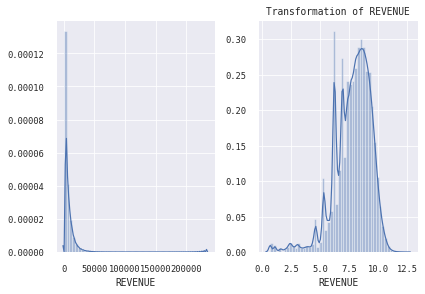

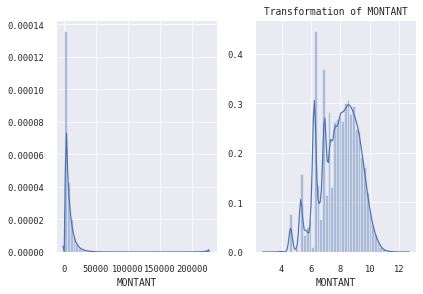

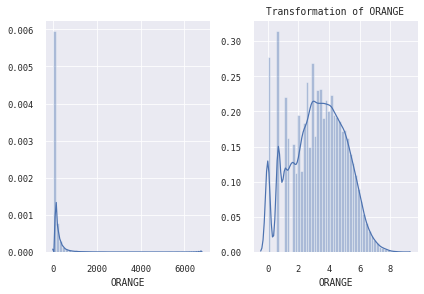

In [72]:
for col in ['REVENUE', 'MONTANT', 'ORANGE']:
    fig, ax = plt.subplots(1,2)

    #plot of normal feature on the first axis
    sns.distplot(train[col], ax=ax[0])

    #Transform the feature and plot on the second axis
    sns.distplot(np.log1p(train[col]), ax=ax[1])

    plt.tight_layout()
    plt.title("Transformation of {}".format(col))

In [73]:
# Normalize skewed features using log transformation
for column in skew_index:
    df[column] = np.log1p(df[column])

In [74]:
train = df[0:400000]
test = df[400000:]

In [75]:
exp_clf = setup(data = train, target = 'CHURN')

IntProgress(value=0, description='Processing: ', max=13)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:57:01
Status,. . . . . . . . . . . . . . . . . .,Fitting Model on 10% sample
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
REGION,Categorical
TENURE,Categorical
MONTANT,Numeric
FREQUENCE_RECH,Numeric
REVENUE,Numeric
ARPU_SEGMENT,Numeric
FREQUENCE,Numeric
DATA_VOLUME,Numeric
ON_NET,Numeric
ORANGE,Numeric


ValueError: ignored

In [ ]:
compare_models()